In [359]:
# THIS CODE SHOULD NOT BE USED FOR ANY CLINICAL IMPLEMENTATIONS. 
# BUT RATHER TO HAVE A WORKING EXAMPLE RELATED TO RT TO START WITH MACHINE LEARNING.

# The presentation related to this example can be found on https://github.com/JDhont/ESTRO38_premeeting

# In order for this code to work, you need to have python, Jupyter notebook and sklearn installed.
# Go to the python.org, jupyter.org and sklearn.org download/installation pages and follow the instructions depending on your operating system.
# Note that MAC often comes with pre-installed python.

# The artificial (!!) dataset used in this example is available on https://github.com/JDhont/ESTRO38_premeeting

# Friendly question, remarks or recommendations are always welcome: jdhont @ etrovub . be (remove spaces)

# Have fun!

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# To make this notebook's output stable across multiple runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [360]:
# To read the data from an Excel file and illustrate the first few rows; 
# Change the location to the Excel file location on your PC!
data = pd.read_excel(r'/Users/jd/Documents/ESTRO/ESTRO 2019/pre-meeting/art_dataset.xlsx',target='LR.1') 
data.head()

,Location_exact,Technique,PTV_V50Gy,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_cc,LR,AP,CC,EUCL,LR.1
0,LBK,tracking,100.0,65.270757,50.158438,64.988175,58.776331,2.997529,1.042057,-2.320747,2.430941,2.07,0
1,RBK,ITV,99.7,64.966415,50.846429,66.780612,61.125832,3.077911,-0.060425,2.595548,0.173770,-2.47,0
2,RMK,ITV,99.9,65.720262,50.765865,63.458783,58.576020,3.037524,-0.763868,1.560995,0.430072,3.74,1
3,ROK,ITV,99.4,65.606667,50.199533,66.705091,60.121550,4.121269,-3.710501,4.900911,2.151000,0.63,0
4,RBK,ITV,100.0,64.131323,48.538011,65.932695,61.160211,4.689836,0.133453,-0.461312,3.404295,6.27,0


In [361]:
# To show some info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
Location_exact    450 non-null object
Technique         450 non-null object
PTV_V50Gy         450 non-null float64
PTV_D2%           450 non-null float64
PTV_D98%          450 non-null float64
GTV_D2%           450 non-null float64
GTV_D98%          450 non-null float64
GTV_cc            450 non-null float64
LR                450 non-null float64
AP                450 non-null float64
CC                450 non-null float64
EUCL              450 non-null float64
LR.1              450 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 45.8+ KB


In [362]:
# To show all possible "Location_exact" categories in the dataset
data["Location_exact"].value_counts()

LBK    107
ROK     90
LOK     85
RMK     84
RBK     84
Name: Location_exact, dtype: int64

In [363]:
# To show number and occurence of "LR.1" categories in the dataset
data["LR.1"].value_counts()

0    322
1    128
Name: LR.1, dtype: int64

In [364]:
# To give some statistics on the numerical features
data.describe()

,PTV_V50Gy,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_cc,LR,AP,CC,EUCL,LR.1
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,98.784400,65.026734,50.992047,65.435297,59.974059,2.965140,-0.137143,-0.076877,-0.031697,-0.462400,0.284444
std,6.310307,0.995817,0.922035,1.207244,0.982862,0.949502,1.916300,1.949572,2.088002,3.286524,0.451652
min,12.150000,61.704439,48.132205,61.417391,57.191275,0.105659,-6.425907,-5.764027,-5.930421,-9.210000,0.000000
25%,99.320000,64.385312,50.355985,64.749954,59.299416,2.304396,-1.564935,-1.337328,-1.608024,-2.717500,0.000000
50%,99.840000,65.003637,51.013296,65.559993,59.946551,2.999732,-0.071847,-0.103986,-0.009322,-0.645000,0.000000
75%,99.987500,65.687670,51.628350,66.328606,60.682423,3.605732,1.049943,1.273636,1.395258,1.680000,1.000000
max,100.000000,68.611350,53.919100,67.965052,62.933606,5.297833,5.485593,4.903425,5.130308,10.430000,1.000000


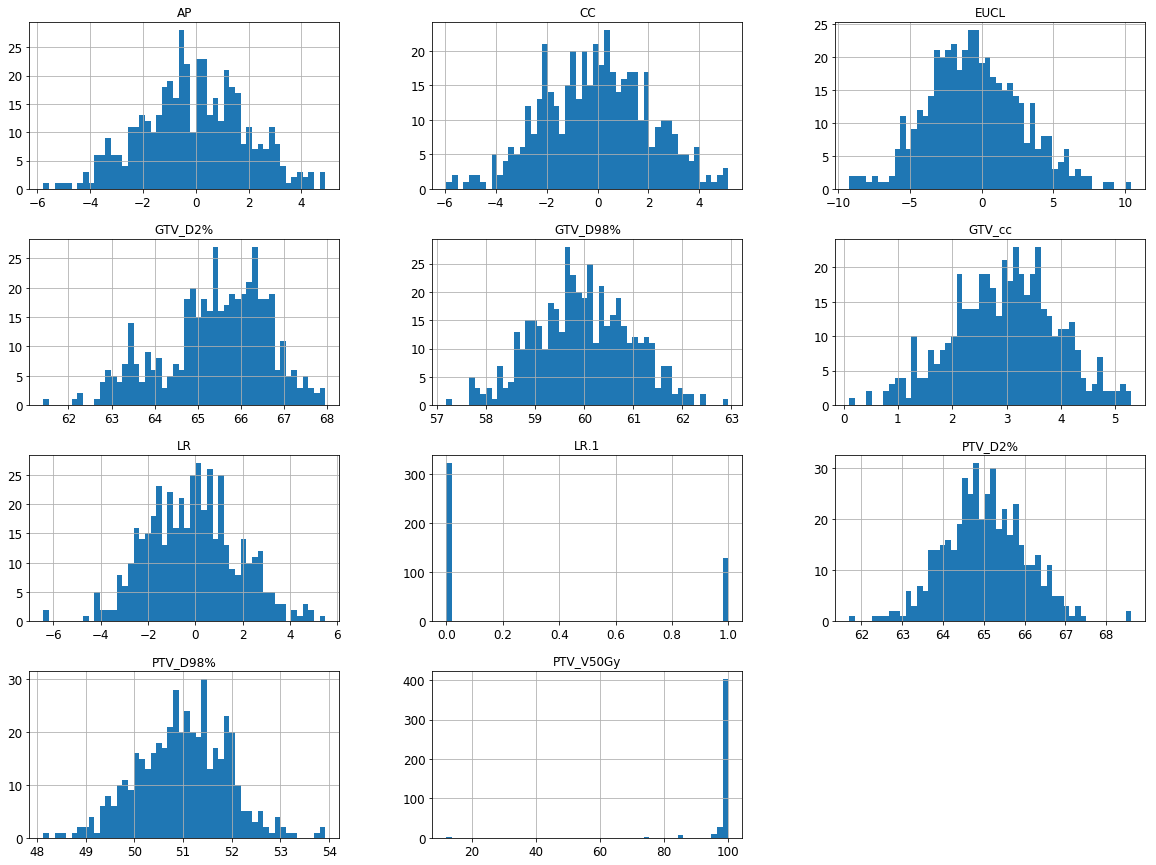

In [365]:
# To plot the histograms of all numerical features
%matplotlib inline
data.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5f3828>,
      dtype=object)

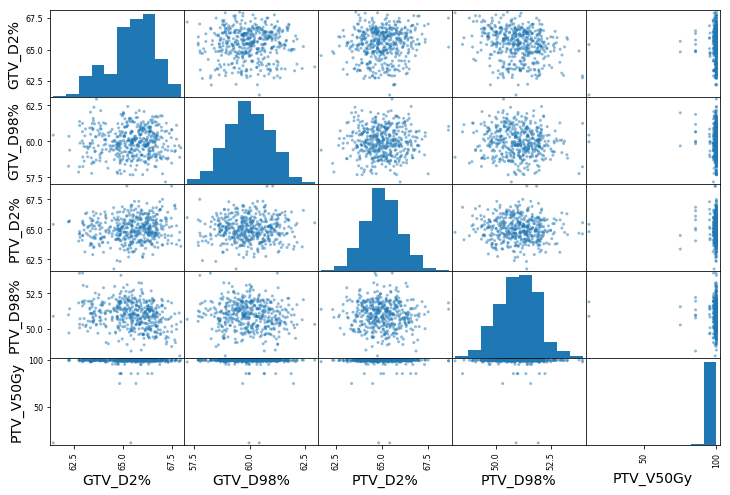

In [366]:
# To visually evaluate inter-feature correlation
from pandas.plotting import scatter_matrix

attributes = ["GTV_D2%", "GTV_D98%",
                  "PTV_D2%","PTV_D98%", "PTV_V50Gy"]
scatter_matrix(data[attributes], figsize=(12, 8))

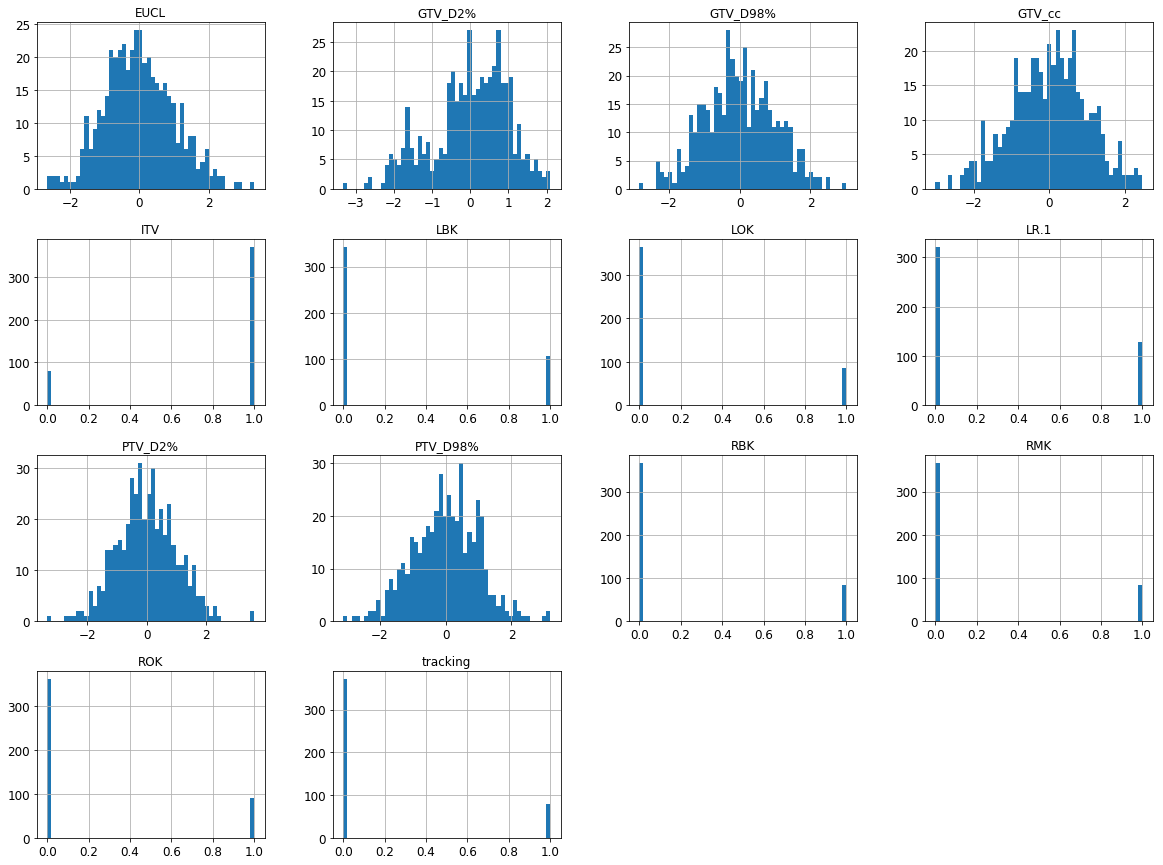

In [367]:
# To drop irrelevant features (based for example on low variance seen previously in the histogram or statistics) 
# and to change categorical natural language features to binary features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

onehot = OneHotEncoder(dtype=np.int, sparse=True)

nominals = pd.DataFrame(
    onehot.fit_transform(data[['Location_exact', 'Technique']])\
    .toarray(),
    columns=['LBK', 'LOK', 'RBK', 'RMK','ROK','ITV', 'tracking'])

data_encoded = data.drop(["Location_exact","Technique","AP","LR","CC","PTV_V50Gy"],axis=1)
data_encoded = nominals.join(data_encoded) 

# To standardize all continuous features
scaler = StandardScaler()
data_encoded["PTV_D98%"] = scaler.fit_transform(data_encoded["PTV_D98%"].values.reshape(-1,1))
data_encoded["PTV_D2%"] = scaler.fit_transform(data_encoded["PTV_D2%"].values.reshape(-1,1))
data_encoded["GTV_D2%"] = scaler.fit_transform(data_encoded["GTV_D2%"].values.reshape(-1,1))
data_encoded["GTV_D98%"] = scaler.fit_transform(data_encoded["GTV_D98%"].values.reshape(-1,1))
data_encoded["GTV_cc"] = scaler.fit_transform(data_encoded["GTV_cc"].values.reshape(-1,1))
data_encoded["EUCL"] = scaler.fit_transform(data_encoded["EUCL"].values.reshape(-1,1))

%matplotlib inline
data_encoded.hist(bins=50, figsize=(20,15)) 
plt.show()

In [368]:
# To split the whole dataset in 80% training - 20% test using stratified sampling based on the labels
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

sss.get_n_splits(data_encoded, data_encoded["LR.1"])

for train_index, test_index in sss.split(data_encoded, data_encoded["LR.1"]):
        train = data_encoded.loc[train_index]
        test = data_encoded.loc[test_index]

In [369]:
# To split the features from the labels
train_features = train.drop("LR.1", axis=1)
train_labels = train["LR.1"].copy()

test_features = test.drop("LR.1", axis=1)
test_labels = test["LR.1"].copy()

train_features.head()

,LBK,LOK,RBK,RMK,ROK,ITV,tracking,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_cc,EUCL
167,0,0,0,1,0,1,0,1.563412,1.157289,-0.157210,2.493965,-0.533984,-0.788213
118,0,0,0,1,0,1,0,-1.915725,1.077945,-1.986077,0.420045,1.284386,1.337976
9,0,0,0,1,0,1,0,0.960787,-0.329976,1.445882,-2.834459,1.563443,-0.066283
408,0,0,0,1,0,0,1,-0.569009,-0.639867,0.984948,1.416638,1.158188,0.229190
146,1,0,0,0,0,1,0,0.712503,1.331649,-0.835444,-0.300710,-0.819706,-0.559754


Optimal number of features : 4
[False False  True False False False False False False  True False  True
  True]


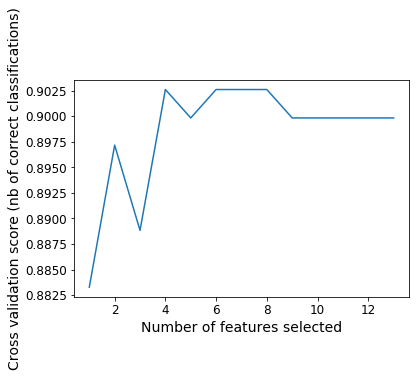

In [380]:
# To perform automatic cross-validation recursive feature selection on the training set
# To see how many and which features are most optimal for modelling.
# cfr. Curse of dimensionality

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(train_features, train_labels)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [381]:
# To select only those features that were indicated to be relevant in the previous step, indicated by 'True' on their location

train_features_forfit = train_features.filter(["EUCL", "GTV_cc","GTV_D2%"],axis=1)
test_features_forfit = test_features.filter(["EUCL", "GTV_cc","GTV_D2%"],axis=1)

train_features_forfit.head()

,EUCL,GTV_cc,GTV_D2%
167,-0.788213,-0.533984,-0.157210
118,1.337976,1.284386,-1.986077
9,-0.066283,1.563443,1.445882
408,0.229190,1.158188,0.984948
146,-0.559754,-0.819706,-0.835444


In [382]:
# To select and train the linear SVC (Support-Vector classification)
# This uses the default settings of the model. Check out the documentation on sklearn.org about SVC to adjust!

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train_features_forfit, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [383]:
# To evaluate the trained model on both the training dataset (above) and the test dataset (below)

from sklearn.metrics import classification_report

predictions_train = clf.predict(train_features_forfit)
print(classification_report(train_labels, predictions_train))

predictions_test = clf.predict(test_features_forfit)
print(classification_report(test_labels, predictions_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.93      0.73      0.81       102

   micro avg       0.91      0.91      0.91       360
   macro avg       0.91      0.85      0.87       360
weighted avg       0.91      0.91      0.90       360

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        64
           1       0.86      0.69      0.77        26

   micro avg       0.88      0.88      0.88        90
   macro avg       0.87      0.82      0.84        90
weighted avg       0.88      0.88      0.87        90



In [ ]:
# Finnished!